<a href="https://colab.research.google.com/github/makarioszen/imersao-dados-2-2020/blob/master/alura_imersao_dados_2_desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alura - Imersão Dados 2 - Desafios**
**Marco Martins**

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
source = "https://github.com/makarioszen/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
df = pd.read_csv(source)

# Aula 1

<BarContainer object of 65 artists>

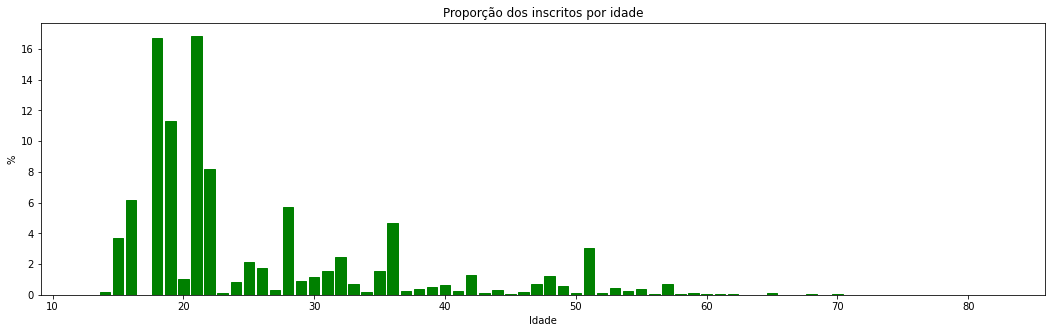

In [6]:
#Desafio 01: Proporção dos inscritos por idade.
age_counts = df['NU_IDADE'].value_counts()
number_of_rows = len(df.index)
age_percents = (age_counts/number_of_rows)*100
age_percents_by_index = age_percents.sort_index()

label = df['NU_IDADE'].unique()
plt.figure(figsize = (18, 5))
plt.title('Proporção dos inscritos por idade')
plt.ylabel("%")
plt.xlabel("Idade")
plt.bar(label, age_percents_by_index, color = 'g', ec = 'g')



In [ ]:
# Desafio 02: Descobrir de quais estados são os inscritos com 13 anos.
states = df.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]
states

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

Text(0.5, 1.0, 'Título do Histograma')

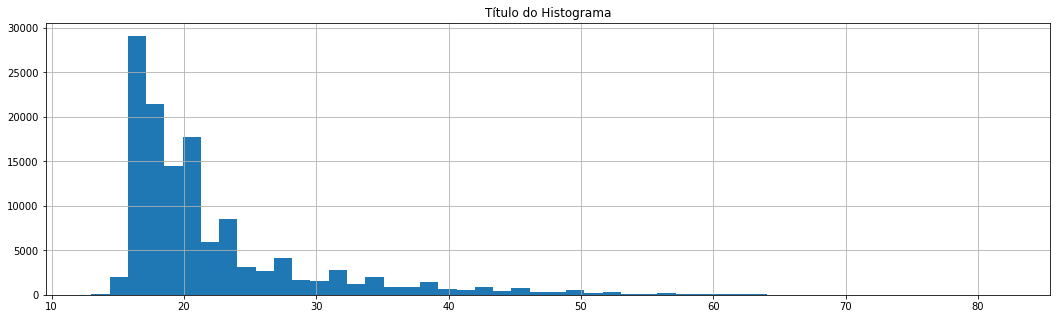

In [7]:
# Desafio 03: Inserir título no histograma
df['NU_IDADE'].hist(bins = 50, figsize=(18,5))
plt.title("Título do Histograma")

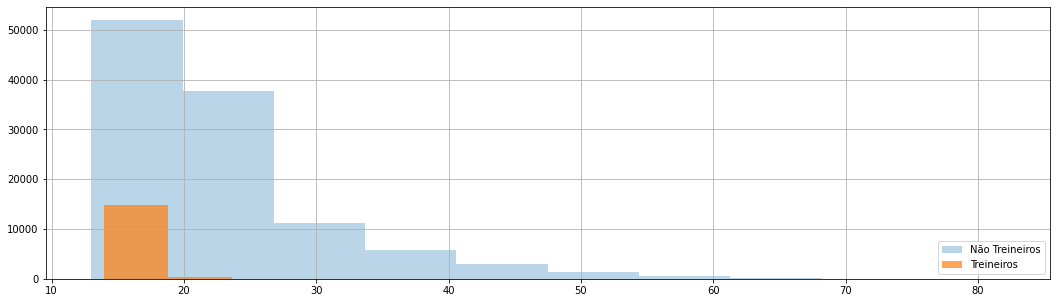

In [8]:
# Desafio 04: Plotar os histogramas das idades dos treineiros e dos não treineiros
trainers = df.query("IN_TREINEIRO == 1")["NU_IDADE"]
not_trainers = df.query("IN_TREINEIRO != 1")["NU_IDADE"]

plt.figure(figsize = (18,5)) 
not_trainers.hist(alpha = 0.3, label = "Não Treineiros")
trainers.hist( alpha = 0.7, label = "Treineiros")

plt.legend(loc='lower right')

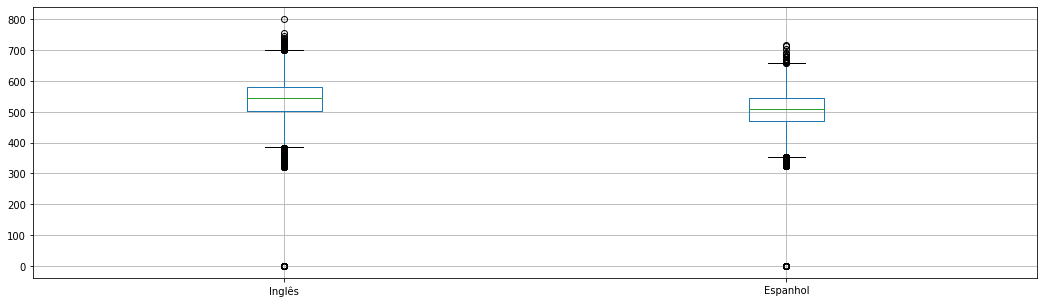

In [10]:
# Desafio 05: Comparar as distribuições das provas em inglês e espanhol
notas_LC_eng = df.query("TP_LINGUA == 0")["NU_NOTA_LC"]
notas_LC_espn =  df.query("TP_LINGUA == 1")["NU_NOTA_LC"]
df_languages = pd.DataFrame({
    'Inglês' : notas_LC_eng,
    'Espanhol' : notas_LC_espn,
})
df_languages.plot.box(grid = True, figsize=(18,5))

# Aula 2

In [ ]:
#MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos

Text(0.5, 1.0, 'Proporção dos alunos menores de idade por Estado')

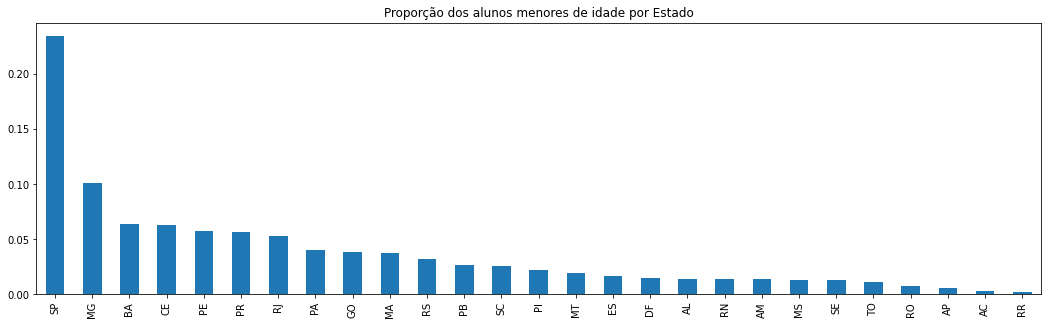

In [17]:
#Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.
students_lt_14 = df.query("NU_IDADE < 18")
students_lt_14["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(18,5))
plt.title("Proporção dos alunos menores de idade por Estado")

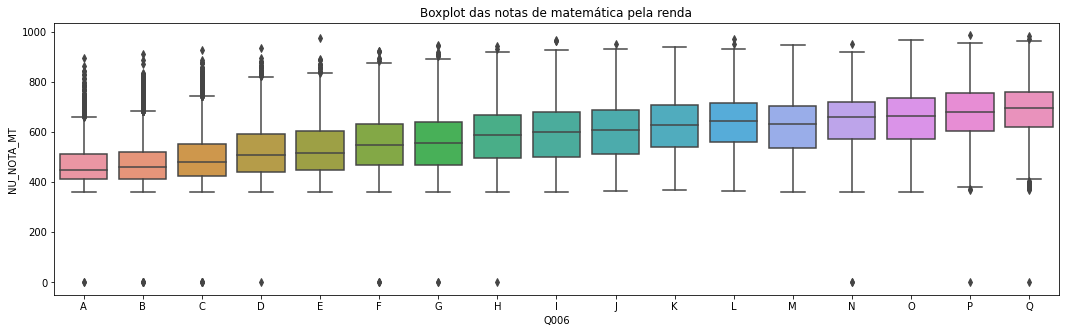

In [37]:
#Desafio 3: Criar uma função para plotar o boxplot do seaborn
def box_plot(x, y, data, title):
    plt.figure(figsize=(18, 5))
    plt.title(title) 
    order = data[x].unique()
    order.sort()
    ax = sns.boxplot(x = x, y = y , data = data, order = order)

box_plot("Q006", "NU_NOTA_MT", df, "Boxplot das notas de matemática pela renda")

In [88]:
#Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente
presences = ["TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT"]
df.query('(NU_NOTA_CN == 0) or (NU_NOTA_CH == 0) or (NU_NOTA_LC == 0) or (NU_NOTA_MT == 0) or (NU_NOTA_REDACAO == 0)')[presences].value_counts()

TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT
1               1               1               1                 2634
0               1               1               0                  958
1               0               0               1                    7
2               1               1               2                    5
dtype: int64

In [94]:
#Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)
df.query('TP_PRESENCA_CN == 2')['NU_NOTA_CN'].head() 

1784    NaN
2867    NaN
3411    NaN
5970    NaN
15619   NaN
Name: NU_NOTA_CN, dtype: float64

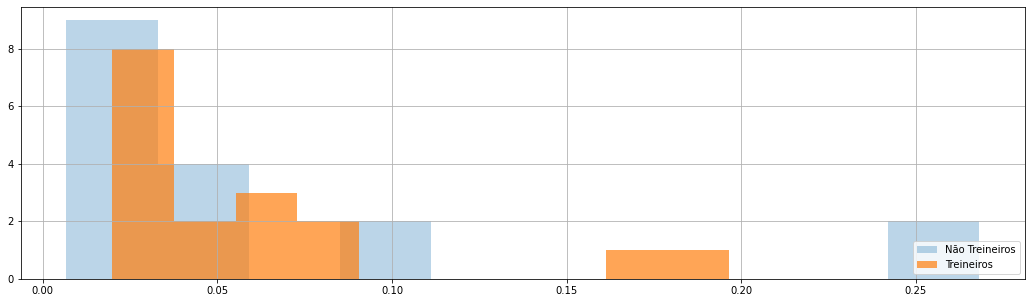

In [106]:
#Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.
trainers = df.query("IN_TREINEIRO == 1")["Q006"].value_counts(normalize = True)
not_trainers = df.query("IN_TREINEIRO != 1")["Q006"].value_counts(normalize = True)

plt.figure(figsize = (18,5)) 
not_trainers.hist(alpha = 0.3, label = "Não Treineiros")
trainers.hist( alpha = 0.7, label = "Treineiros")

plt.legend(loc='lower right')

In [107]:
#Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.